In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Data preprocessing nad visualization

In [5]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [6]:
retained = df[df.left==0]
retained.shape

(11428, 10)

## Average numbers for all columns

In [7]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

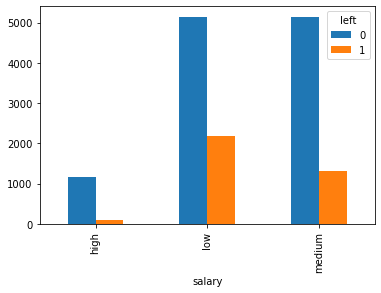

In [8]:
pd.crosstab(df.salary, df.left).plot(kind = 'bar')

<AxesSubplot:xlabel='salary', ylabel='count'>

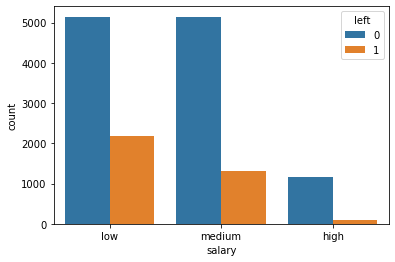

In [9]:
sns.countplot(x = 'salary', data = df, hue = 'left')
# Below bar chart shows employees with high salaries ar likely to not leave the company

### Department wise employee retention rate

<AxesSubplot:xlabel='Department'>

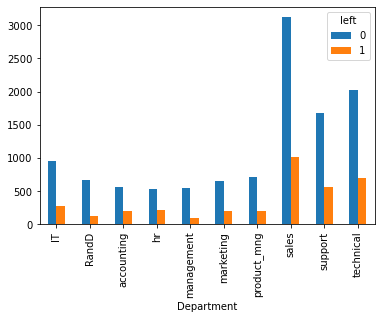

In [10]:
pd.crosstab(df.Department, df.left).plot(kind = 'bar')

<AxesSubplot:xlabel='Department', ylabel='count'>

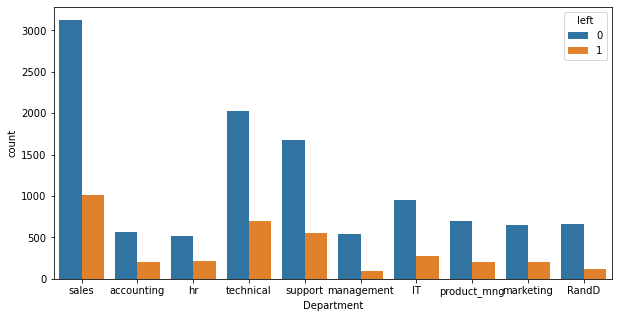

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x = df.Department, data = df, hue = 'left')

In [12]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [13]:
# converting salary column into categorical
salary_dummies = pd.get_dummies(df['salary'], prefix = 'salary')
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [14]:
df_with_dummies = pd.concat([df, salary_dummies], axis = 'columns')
df_with_dummies

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,1,0


In [19]:
columns = ['satisfaction_level','average_montly_hours','promotion_last_5years','salary_high', 'salary_low', 'salary_medium']
new_df = df_with_dummies[columns]
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [20]:
X = new_df
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [29]:
y = df.left

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, train_size=0.3)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 200)

In [43]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [47]:
predictions = model.predict(X_test)
predictions

array([1, 0, 0, ..., 0, 0, 0])

### Accuracy of the model

In [46]:
model.score(X_test, y_test)

0.7845714285714286

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      8043
           1       0.59      0.26      0.36      2457

    accuracy                           0.78     10500
   macro avg       0.70      0.60      0.62     10500
weighted avg       0.76      0.78      0.75     10500



In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[7590  453]
 [1809  648]]
